##Classification of planets

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [4]:
# Load the dataset
file_path = '/content/keplar_dataset.csv'
data = pd.read_csv(file_path)
data.head(10)

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
7,10872983,K00756.03,Kepler-228 b,CONFIRMED,CANDIDATE,0.992,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
8,6721123,K00114.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,-124.0,3.986,0.182,-0.098,1.958,0.322,-0.483,298.86435,42.151569,12.660
9,10910878,K00757.01,Kepler-229 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-83.0,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841


#Pre-processing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2360 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

In [6]:
# List of columns to drop
columns_to_drop = ['koi_teq_err1', 'koi_teq_err2']
# Dropping the columns that contain all nulls
data = data.drop(columns=columns_to_drop)

In [7]:
# Check missing values
print("Missing values initially:\n", data.isnull().sum())

Missing values initially:
 kepid                   0
kepoi_name              0
kepler_name          7204
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff             363
koi_steff_err1        468
koi_steff_e

In [8]:
# Fill the missing values using median for numerical columns
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].median(), inplace=True)
print("Missing values after filling:\n", data.isnull().sum())

Missing values after filling:
 kepid                   0
kepoi_name              0
kepler_name          7204
koi_disposition         0
koi_pdisposition        0
koi_score               0
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1         0
koi_period_err2         0
koi_time0bk             0
koi_time0bk_err1        0
koi_time0bk_err2        0
koi_impact              0
koi_impact_err1         0
koi_impact_err2         0
koi_duration            0
koi_duration_err1       0
koi_duration_err2       0
koi_depth               0
koi_depth_err1          0
koi_depth_err2          0
koi_prad                0
koi_prad_err1           0
koi_prad_err2           0
koi_teq                 0
koi_insol               0
koi_insol_err1          0
koi_insol_err2          0
koi_model_snr           0
koi_tce_plnt_num        0
koi_tce_delivname     346
koi_steff               0
koi_steff_err1          0
koi_ste

In [9]:
data.head(5)

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [10]:
data.dtypes

kepid                  int64
kepoi_name            object
kepler_name           object
koi_disposition       object
koi_pdisposition      object
koi_score            float64
koi_fpflag_nt          int64
koi_fpflag_ss          int64
koi_fpflag_co          int64
koi_fpflag_ec          int64
koi_period           float64
koi_period_err1      float64
koi_period_err2      float64
koi_time0bk          float64
koi_time0bk_err1     float64
koi_time0bk_err2     float64
koi_impact           float64
koi_impact_err1      float64
koi_impact_err2      float64
koi_duration         float64
koi_duration_err1    float64
koi_duration_err2    float64
koi_depth            float64
koi_depth_err1       float64
koi_depth_err2       float64
koi_prad             float64
koi_prad_err1        float64
koi_prad_err2        float64
koi_teq              float64
koi_insol            float64
koi_insol_err1       float64
koi_insol_err2       float64
koi_model_snr        float64
koi_tce_plnt_num     float64
koi_tce_delivn

In [11]:
# Encoding
label_encoder = LabelEncoder()
data['koi_disposition'] = label_encoder.fit_transform(data['koi_disposition'])
data['kepoi_name'] = label_encoder.fit_transform(data['kepoi_name'])
data['kepler_name'] = label_encoder.fit_transform(data['kepler_name'])
data['koi_pdisposition'] = label_encoder.fit_transform(data['koi_pdisposition'])
data['koi_tce_delivname'] = label_encoder.fit_transform(data['koi_tce_delivname'])
data.head(5)

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,1080,1090,1,0,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,1081,1091,1,0,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,1082,2360,0,0,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,1083,2360,2,1,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,1084,1929,1,0,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [12]:
data.dtypes

kepid                  int64
kepoi_name             int64
kepler_name            int64
koi_disposition        int64
koi_pdisposition       int64
koi_score            float64
koi_fpflag_nt          int64
koi_fpflag_ss          int64
koi_fpflag_co          int64
koi_fpflag_ec          int64
koi_period           float64
koi_period_err1      float64
koi_period_err2      float64
koi_time0bk          float64
koi_time0bk_err1     float64
koi_time0bk_err2     float64
koi_impact           float64
koi_impact_err1      float64
koi_impact_err2      float64
koi_duration         float64
koi_duration_err1    float64
koi_duration_err2    float64
koi_depth            float64
koi_depth_err1       float64
koi_depth_err2       float64
koi_prad             float64
koi_prad_err1        float64
koi_prad_err2        float64
koi_teq              float64
koi_insol            float64
koi_insol_err1       float64
koi_insol_err2       float64
koi_model_snr        float64
koi_tce_plnt_num     float64
koi_tce_delivn

In [13]:
data.isna().sum()

kepid                0
kepoi_name           0
kepler_name          0
koi_disposition      0
koi_pdisposition     0
koi_score            0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_tce_delivname    0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad             0
koi_srad_err1        0
koi_srad_er

In [14]:
# Calculate skewness for each numeric feature
skewness = data.skew()
print(f"Skewness of each feature: {skewness}")

Skewness of each feature: kepid                -0.171807
kepoi_name            0.000000
kepler_name          -2.016814
koi_disposition      -0.512358
koi_pdisposition     -0.027192
koi_score             0.212291
koi_fpflag_nt        96.930193
koi_fpflag_ss         1.265050
koi_fpflag_co         1.519817
koi_fpflag_ec         2.338618
koi_period           96.459326
koi_period_err1       8.738748
koi_period_err2      -8.738748
koi_time0bk           3.682070
koi_time0bk_err1     11.425712
koi_time0bk_err2    -11.425712
koi_impact           23.967077
koi_impact_err1       6.507852
koi_impact_err2     -27.179302
koi_duration          5.928765
koi_duration_err1     8.488736
koi_duration_err2    -8.488736
koi_depth             5.369205
koi_depth_err1       94.981063
koi_depth_err2      -94.981063
koi_prad             53.137349
koi_prad_err1        41.353703
koi_prad_err2       -57.863050
koi_teq               3.589774
koi_insol            50.806469
koi_insol_err1       43.638033
koi_insol_err

<ipython-input-15-344e96b2369c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skewness.index, y=skewness.values, palette='viridis')


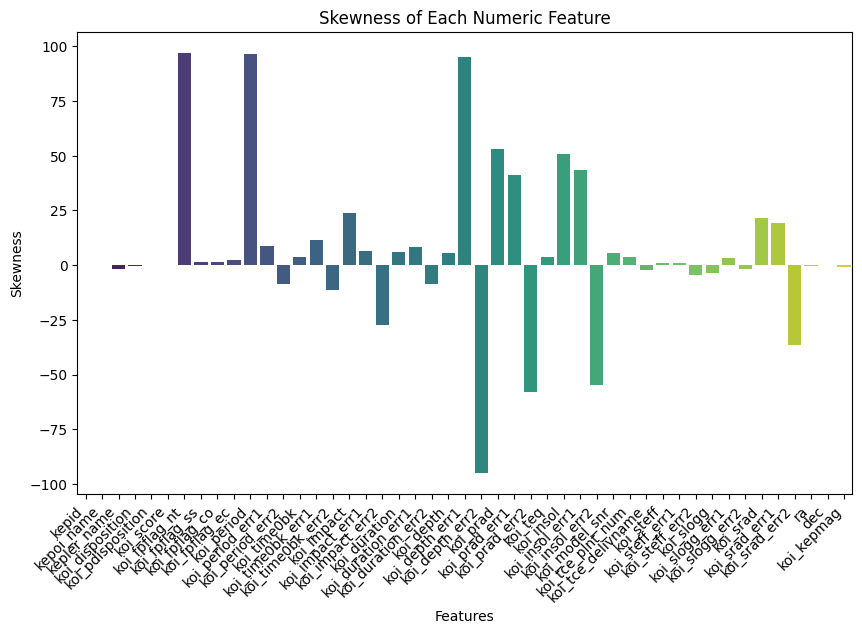

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x=skewness.index, y=skewness.values, palette='viridis')
plt.title('Skewness of Each Numeric Feature')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.xticks(rotation=45, ha='right')
plt.show()

In [16]:
#Check class imbalance
class_counts = data['koi_disposition'].value_counts()
print(class_counts)

koi_disposition
2    4840
0    2366
1    2358
Name: count, dtype: int64


<ipython-input-17-8dbec974451f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='koi_disposition', data=data, palette='viridis')


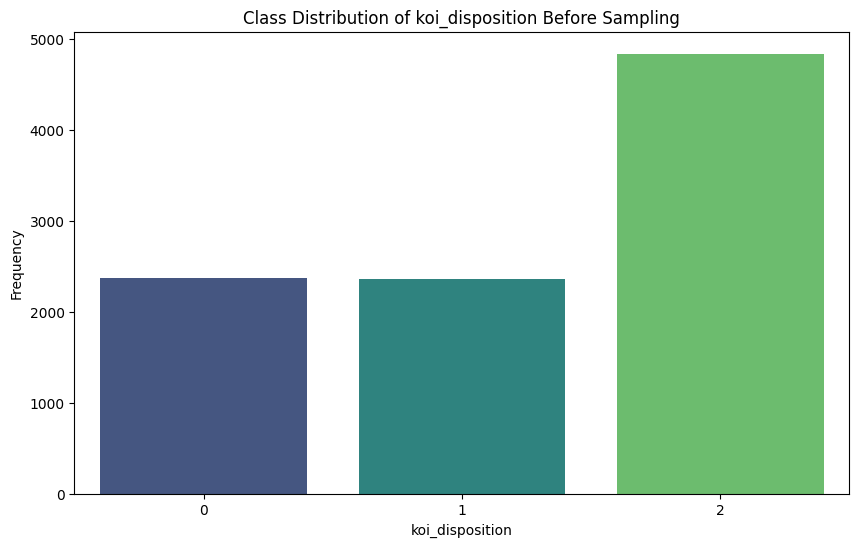

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='koi_disposition', data=data, palette='viridis')
plt.title('Class Distribution of koi_disposition Before Sampling')
plt.xlabel('koi_disposition')
plt.ylabel('Frequency')
plt.show()

In [18]:
#Split the target column from other feature columns
features = data.drop('koi_disposition',axis=1)
target = data['koi_disposition']

In [19]:
# Scale the features - X_scaled = (X - X_mean) / SD(feature)
scaler = StandardScaler()
features = scaler.fit_transform(features)
features

array([[ 1.17092219, -1.34069136, -1.60130715, ..., -0.02642094,
         1.20276381,  0.78132018],
       [ 1.17092219, -1.34032916, -1.599671  , ..., -0.02642094,
         1.20276381,  0.78132018],
       [ 1.17621216, -1.33996696,  0.47660969, ...,  1.03739693,
         1.20067497,  0.84556593],
       ...,
       [ 0.92587677,  1.61886264,  0.47660969, ...,  0.44157509,
         0.93468399,  0.80875095],
       [ 0.92889563,  1.61922484,  0.47660969, ...,  0.98663754,
         0.9260368 , -2.35805905],
       [ 0.92920618,  1.61958704,  0.47660969, ...,  1.03843545,
         0.91933849,  0.40522991]])

In [20]:
# Train test split of data
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [21]:
#Handle the class imbalance
from imblearn.over_sampling import SMOTE
# Initialize SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

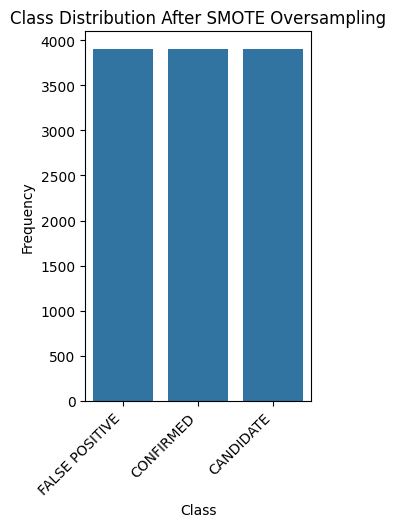

In [22]:
# After sampling
plt.subplot(1, 2, 2)
y_train_resampled_series = pd.Series(y_train_resampled)
sns.countplot(x=y_train_resampled_series.map({0: 'CANDIDATE', 1: 'CONFIRMED', 2: 'FALSE POSITIVE'}))
plt.title('Class Distribution After SMOTE Oversampling')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [23]:
# covariance = []
# for col in list(data.columns):
#   covariance.append((data["koi_disposition"].cov(data[col]),col))
# covariance.sort(reverse = True)
# covariance[:2]

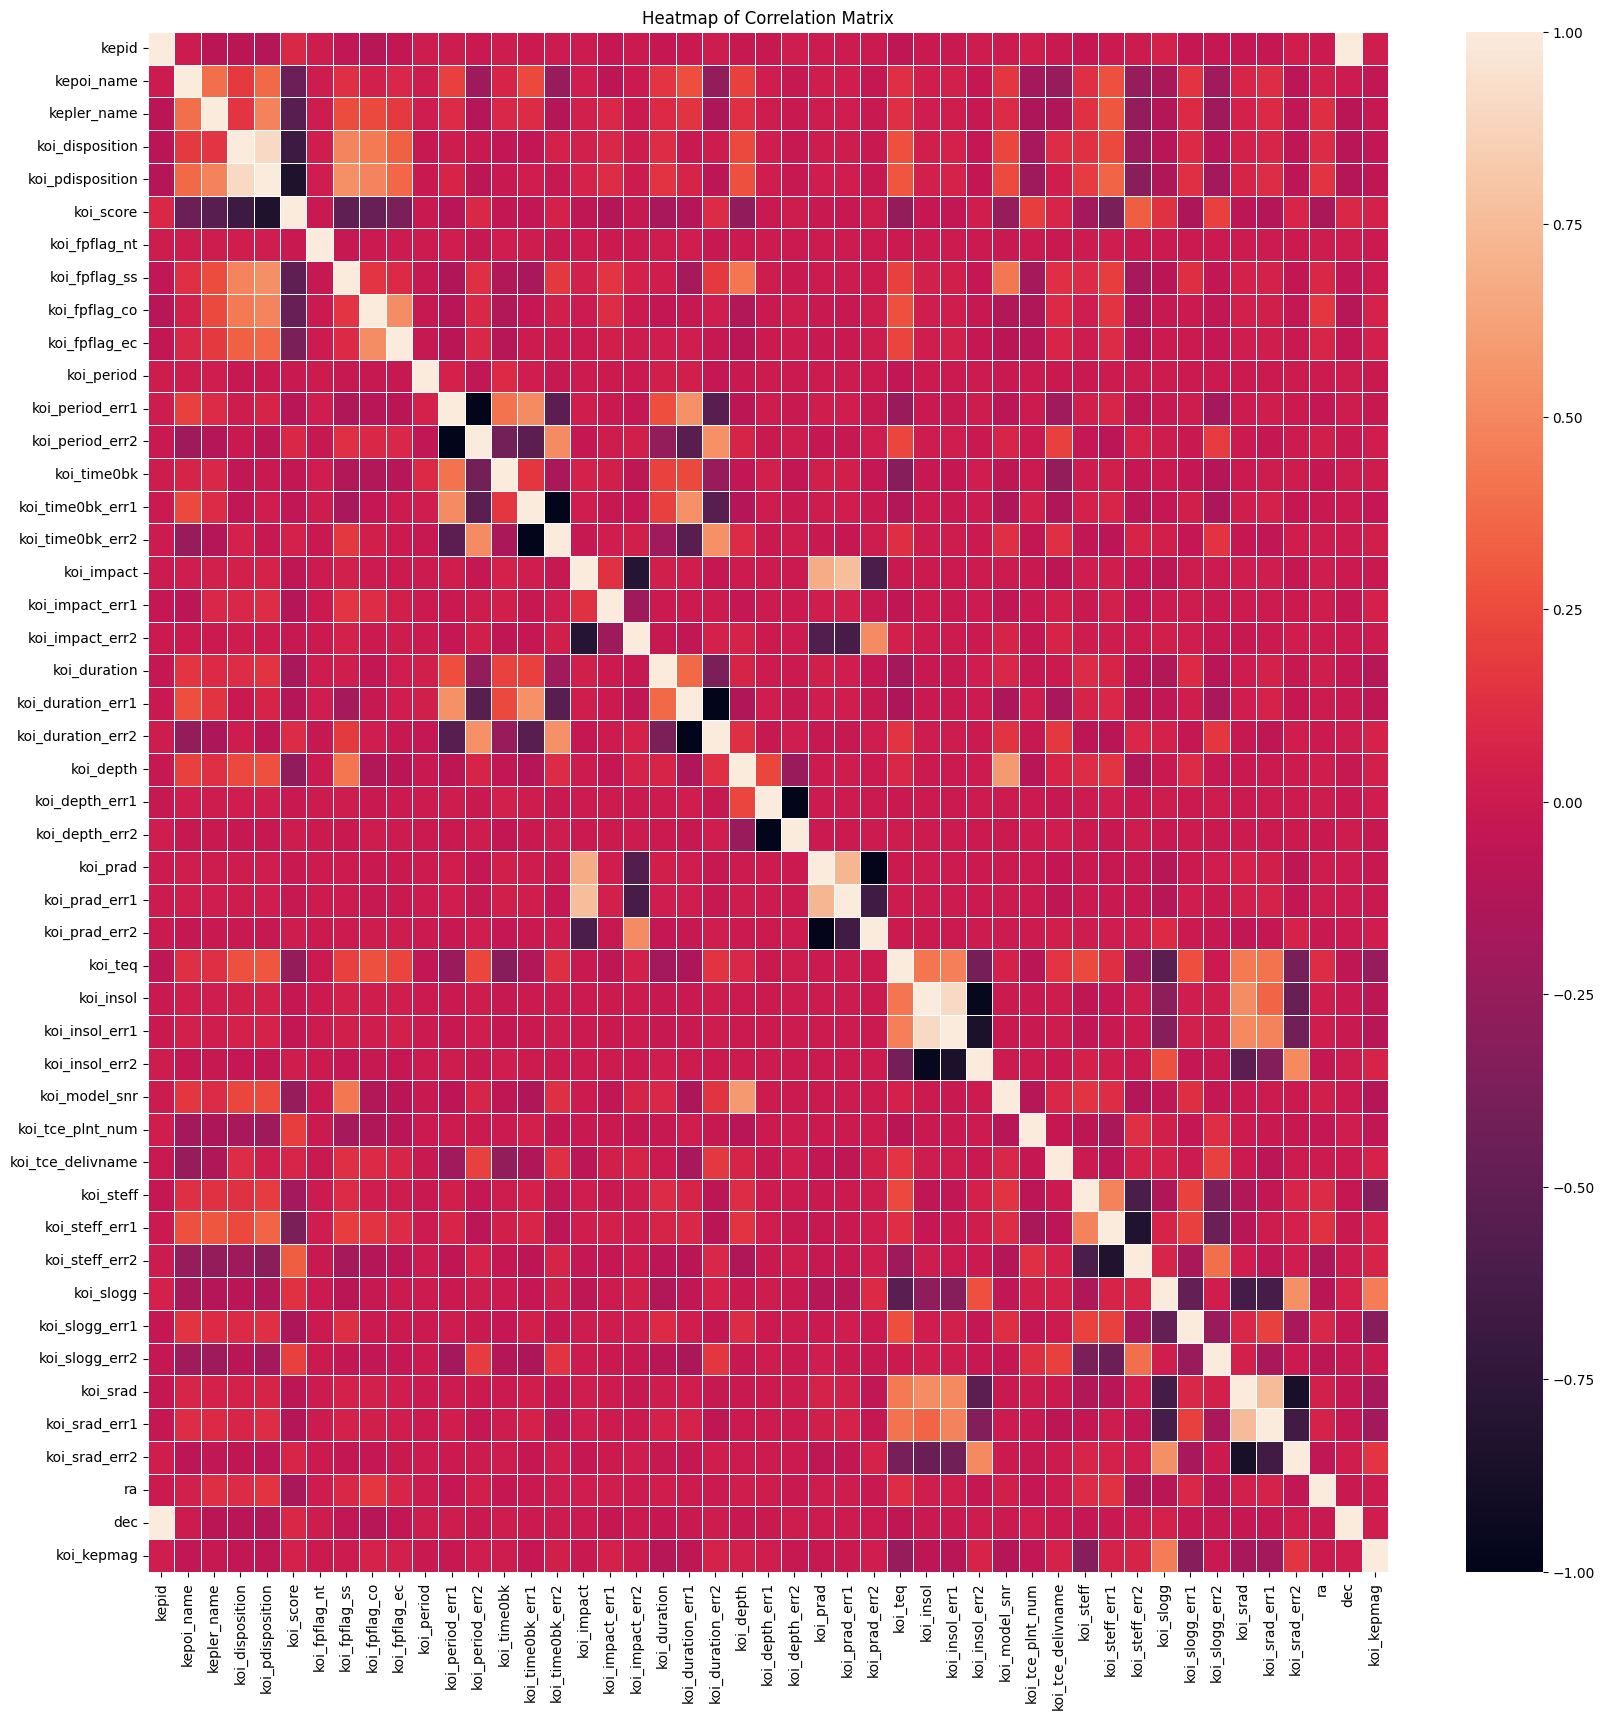

In [24]:
# Calculate the correlation matrix
corr_matrix = data.corr()
# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, linewidths=0.7)
plt.title('Heatmap of Correlation Matrix')
plt.show()

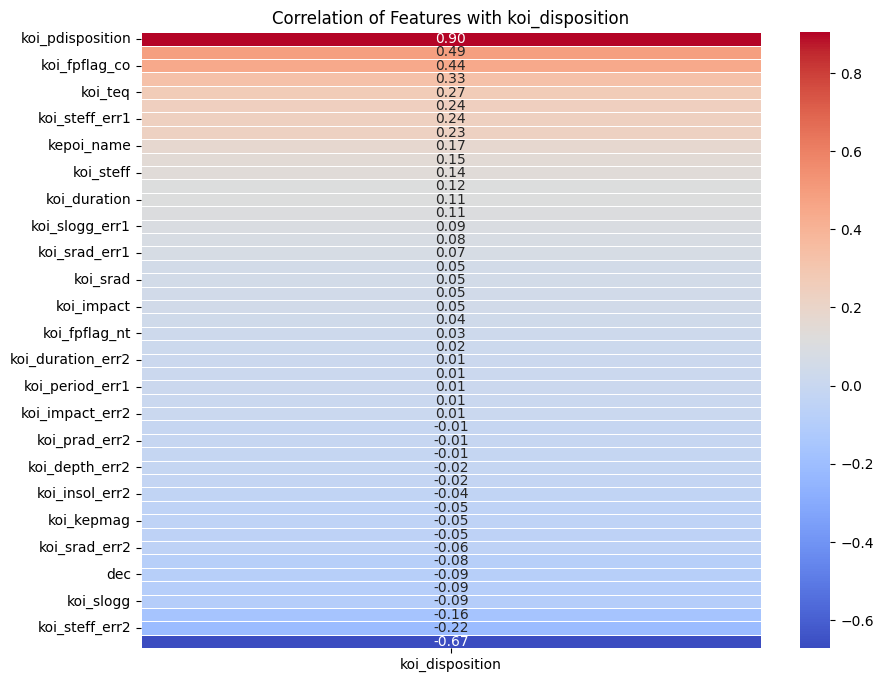

In [25]:
# Plot the heatmap focusing on the target column correlations
target_column = 'koi_disposition'
target_corr_matrix = corr_matrix[[target_column]].drop(target_column).sort_values(by=target_column, ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(target_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title(f'Correlation of Features with {target_column}')
plt.show()

In [26]:
#PCA - Dimensionality reduction
import numpy as np
pca = PCA(n_components = 20)
pca.fit(features)
pca_data = pca.transform(features)

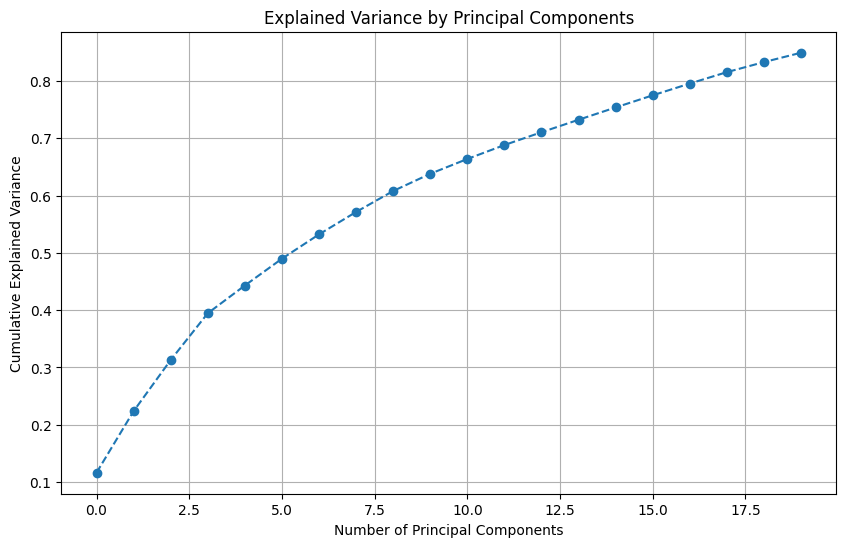

In [27]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

In [28]:
# Scale the features - X_scaled = (X - X_mean) / SD(feature)
scaler = StandardScaler()
features = scaler.fit_transform(pca_data)
features

array([[-1.23156823,  0.3152953 ,  0.91886559, ..., -0.64018555,
         0.08887188, -0.11126767],
       [-1.27795755,  0.20594922,  1.04142089, ...,  0.46945232,
         0.56454326,  0.06773057],
       [-0.50599958,  0.13985134, -0.13792544, ..., -0.54173352,
        -0.30065113, -0.17623329],
       ...,
       [ 0.5044067 ,  0.2178841 , -0.99822773, ..., -0.0150627 ,
        -0.68631786,  0.77863372],
       [ 0.22318269,  0.35259123,  0.96641076, ..., -1.09798664,
        -2.36553019, -0.51734841],
       [ 0.60922089,  0.00762957, -1.0563114 , ...,  0.10278258,
         0.13036727, -0.53593155]])

#Model Building

In [29]:
len(pca_data[0])

20

In [30]:
# Train test split of data
X_train_resampled, X_test, y_train_resampled, y_test = train_test_split(pca_data, target, test_size=0.2, random_state=42)

Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=100, penalty = 'l2', random_state=42)

In [33]:
# Train the model
lr_model.fit(X_train_resampled, y_train_resampled)
lr_y_pred = lr_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, lr_y_pred)}")

Logistic Regression Accuracy: 0.9691583899634083


In [35]:
def print_classification_report(y_true, y_pred):
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    print(report_df)

In [36]:
print(f"Logisic Regression Classification Report:")
print_classification_report(y_test, lr_y_pred)

Logisic Regression Classification Report:
              precision    recall  f1-score      support
0              0.942029  0.940083  0.941055   484.000000
1              0.937247  0.944898  0.941057   490.000000
2              1.000000  0.996805  0.998400   939.000000
accuracy       0.969158  0.969158  0.969158     0.969158
macro avg      0.959759  0.960595  0.960171  1913.000000
weighted avg   0.969259  0.969158  0.969203  1913.000000


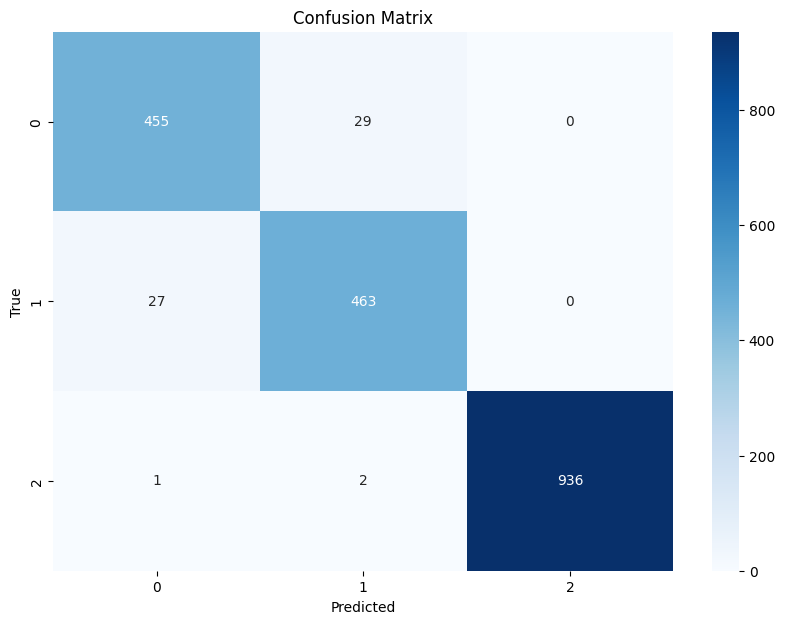

In [37]:
# Plotting
cm = confusion_matrix(y_test, lr_y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Random Forest classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
# Model training - Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [40]:
# Predict and evaluate
rf_model.fit(X_train_resampled, y_train_resampled)
rf_y_pred = rf_model.predict(X_test)

In [41]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_y_pred))

Random Forest Accuracy: 0.9346576058546785


In [42]:
print(f"Random Forest Classification Report:")
print_classification_report(y_test, rf_y_pred)

Random Forest Classification Report:
              precision    recall  f1-score      support
0              0.893478  0.849174  0.870763   484.000000
1              0.919028  0.926531  0.922764   490.000000
2              0.962461  0.982961  0.972603   939.000000
accuracy       0.934658  0.934658  0.934658     0.934658
macro avg      0.924989  0.919555  0.922043  1913.000000
weighted avg   0.933883  0.934658  0.934071  1913.000000


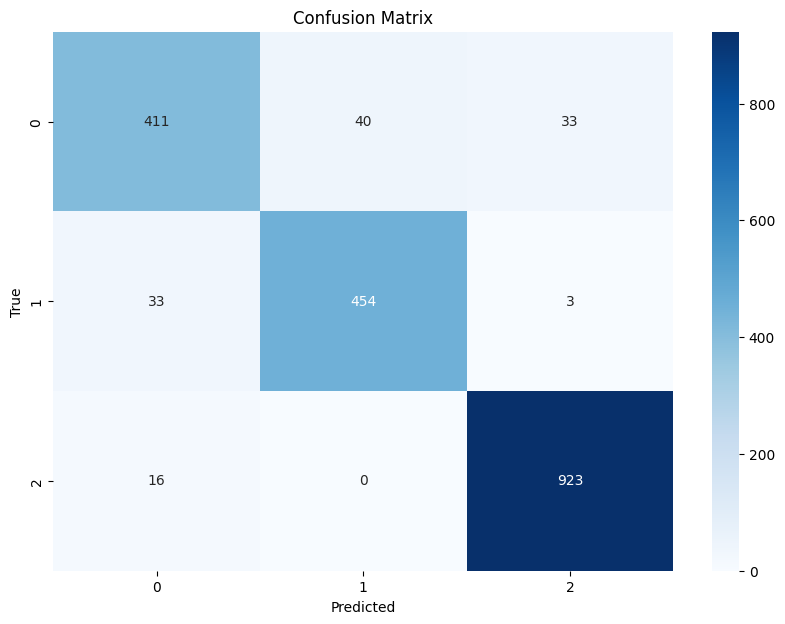

In [43]:
# Plotting
cm = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Support Vector Machine

In [44]:
from sklearn.svm import SVC

In [45]:
# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

In [46]:
# Train the model
svm_model.fit(X_train_resampled, y_train_resampled)
svm_y_pred = svm_model.predict(X_test)

In [47]:
print(f"SVM Accuracy: {accuracy_score(y_test, svm_y_pred)}")

SVM Accuracy: 0.970726607422896


In [48]:
print(f"SVM Classification Report:")
print_classification_report(y_test, svm_y_pred)

SVM Classification Report:
              precision    recall  f1-score      support
0              0.938776  0.950413  0.944559   484.000000
1              0.948560  0.940816  0.944672   490.000000
2              0.998933  0.996805  0.997868   939.000000
accuracy       0.970727  0.970727  0.970727     0.970727
macro avg      0.962089  0.962678  0.962366  1913.000000
weighted avg   0.970810  0.970727  0.970755  1913.000000


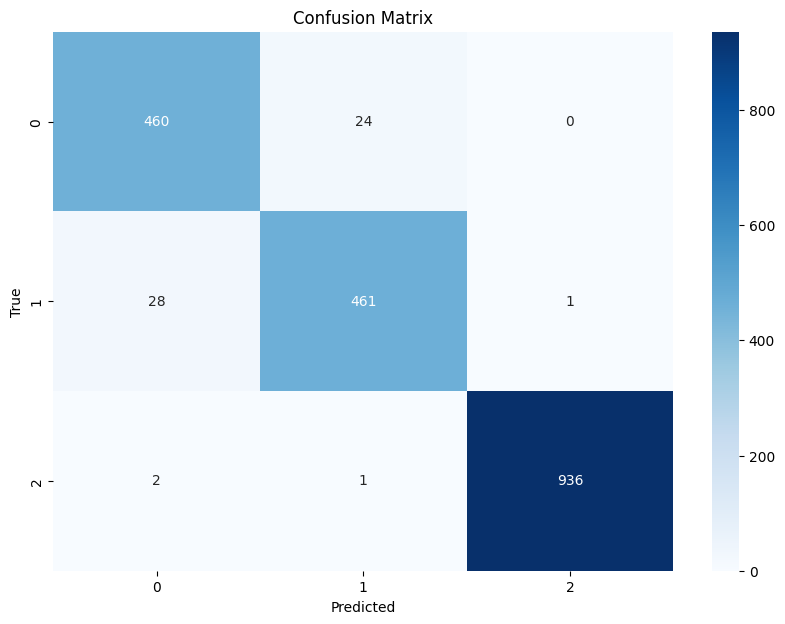

In [49]:
# Plotting
cm = confusion_matrix(y_test, svm_y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

K-Nearest Neighbors

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

In [52]:
# Train the model
knn_model.fit(X_train_resampled, y_train_resampled)
knn_y_pred = knn_model.predict(X_test)

In [53]:
print(f"KNN Accuracy: {accuracy_score(y_test, knn_y_pred)}")

KNN Accuracy: 0.9116570831155254


In [54]:
print(f"KNN Classification Report:")
print_classification_report(y_test, knn_y_pred)

KNN Classification Report:
              precision    recall  f1-score      support
0              0.858770  0.778926  0.816901   484.000000
1              0.871401  0.926531  0.898121   490.000000
2              0.958027  0.972311  0.965116   939.000000
accuracy       0.911657  0.911657  0.911657     0.911657
macro avg      0.896066  0.892589  0.893379  1913.000000
weighted avg   0.910726  0.911657  0.910457  1913.000000


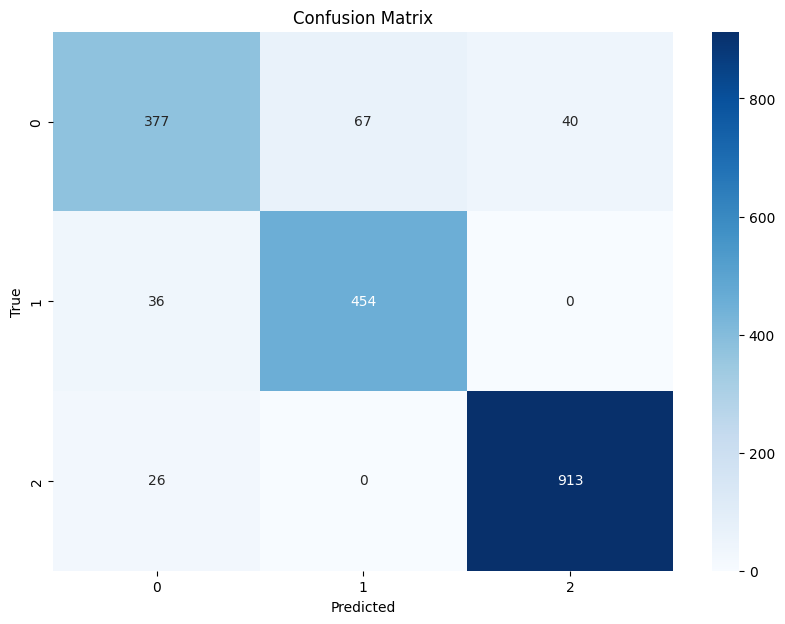

In [55]:
# Plotting
cm = confusion_matrix(y_test, knn_y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()